In [ ]:
#importando bibliotecas 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import sys 
import os
import pandas as pd 
#procurando o arquivo modeling fora do notebook
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../src/evaluation"))
from modeling import Decisiontree, KNN, RandomForest
from evaluation import plot_confusion_matrix

In [13]:
#importando o dataset modelado 
df = pd.read_csv(r"../data/processed/df_modelado.csv")
df

,IDCREDITO,Duracao,Valor,TempoParcelamento,Idade,EmprestimoExistente,SocioEmpresa,Estrangeiro,EMPREGO,ESTADOCIVIL,FIADOR,HABITACAO,HISTORICO,OUTROSFINANCIAMENTOS,PROFISSAO,PROPOSITO,INVESTIMENTOS,Status
0,2,48,5951,2,22,1,0,0,0,2,2,2,2,2,3,6,2,0
1,3,12,2096,2,49,1,0,0,1,3,2,2,1,2,2,1,2,1
2,4,42,7882,2,45,1,0,0,1,3,3,1,2,2,3,2,2,1
3,5,24,4870,3,53,2,0,0,0,3,2,1,0,2,3,8,2,0
4,6,36,9055,2,35,1,1,0,0,3,2,1,2,2,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,1207,4,24,1,0,0,2,2,2,0,2,2,3,8,2,0
996,834,24,5084,2,42,1,1,0,3,2,2,2,2,2,3,6,4,1
997,234,18,866,4,25,1,0,0,0,1,3,2,2,2,2,6,2,1
998,474,6,1238,4,36,1,1,0,4,3,2,2,2,2,0,4,4,1


In [6]:
#utilizando os modelos 
modelos = {
    "Decision Tree": Decisiontree(),
    "KNN": KNN(),
    "Random Forest": RandomForest()
}

In [44]:
#Separando x: previsores e y: classe
X = df.drop("Status", axis=1).values
y = df["Status"].values
X

array([[   2,   48, 5951, ...,    3,    6,    2],
       [   3,   12, 2096, ...,    2,    1,    2],
       [   4,   42, 7882, ...,    3,    2,    2],
       ...,
       [ 234,   18,  866, ...,    2,    6,    2],
       [ 474,    6, 1238, ...,    0,    4,    4],
       [ 565,   24, 4712, ...,    0,    0,    4]])

In [70]:
#Dividindo a base de dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_test

array([[  95,   12, 1318, ...,    3,    8,    3],
       [ 881,   24, 7814, ...,    0,    9,    2],
       [ 308,   12,  727, ...,    2,    6,    0],
       ...,
       [  56,    6,  783, ...,    2,    8,    4],
       [ 507,   15, 2360, ...,    3,    9,    1],
       [  16,   24, 1282, ...,    2,    6,    0]])

In [71]:
#criação e treinando os modelos 
resultado = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    resultado[nome] = [acc, prec, rec]

In [72]:
df_resultados = pd.DataFrame.from_dict(
    resultado, orient='index',
    columns=["Accuracy", "Precision", "Recall"]
)

# Ordena pelo melhor accuracy (ou qualquer métrica que queira priorizar)
df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False)

# Mostra
print(df_resultados)

               Accuracy  Precision    Recall
Random Forest  0.793333   0.832653  0.906667
Decision Tree  0.703333   0.830097  0.760000
KNN            0.673333   0.763485  0.817778


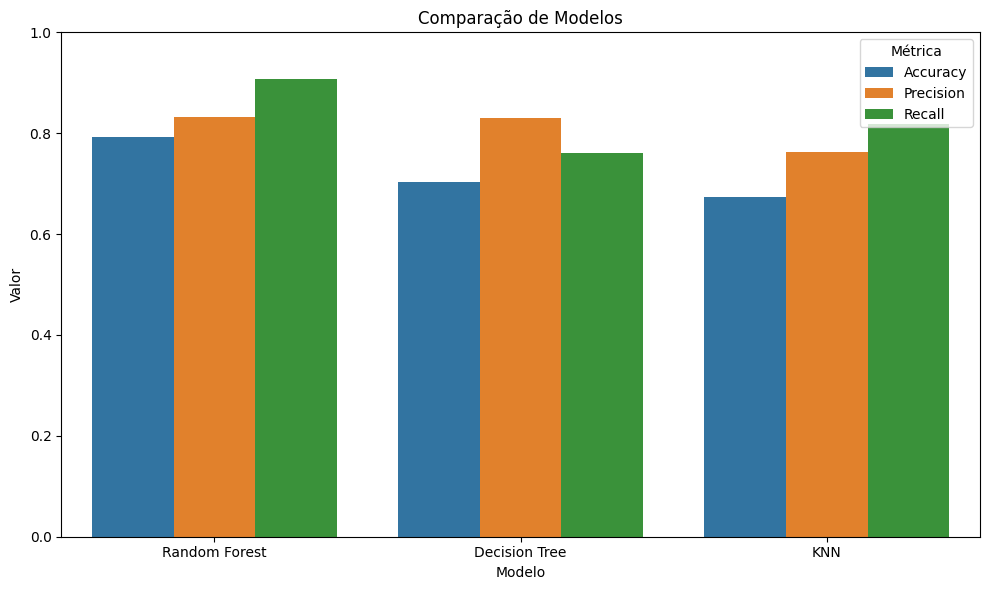

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df_resultados.reset_index(inplace=True)
df_resultados.rename(columns={"index": "Modelo"}, inplace=True)

df_plot = df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparação de Modelos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


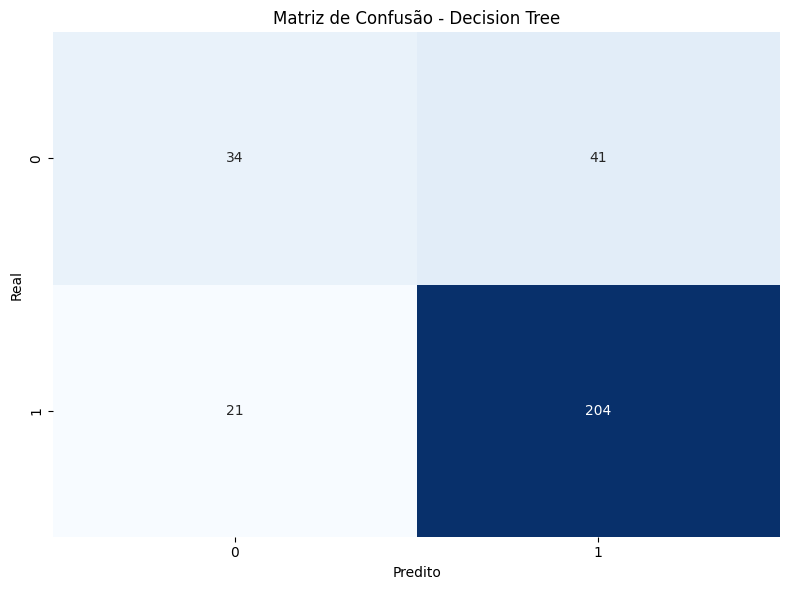

In [74]:
#criando a matriz de confusão 
plot_confusion_matrix(y_test, y_pred, nome_modelo = "Decision Tree")

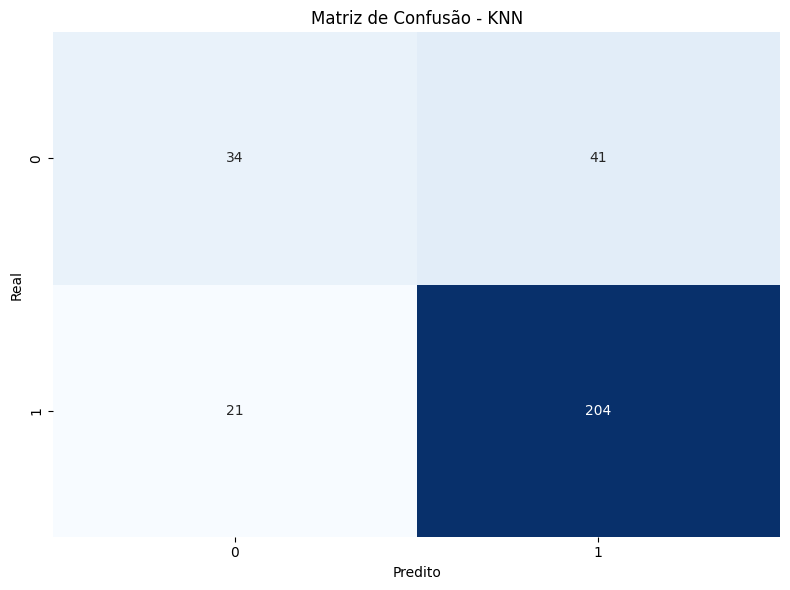

In [75]:
plot_confusion_matrix(y_test, y_pred, nome_modelo = "KNN")

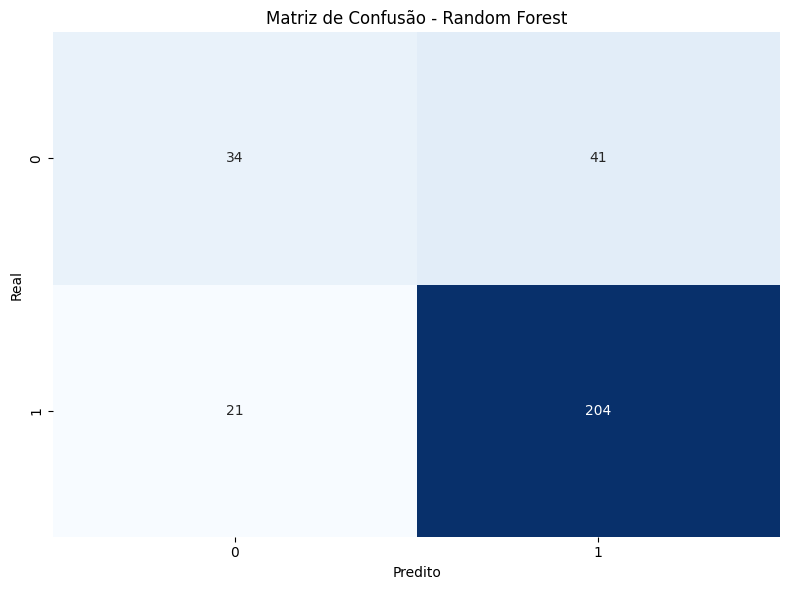

In [76]:
#modelo Random Forest 
plot_confusion_matrix(y_test, y_pred, nome_modelo = "Random Forest")    

In [88]:
import joblib

for nome, modelo in modelos.items():
    if nome == "Random Forest":
        joblib.dump(modelo, r"C:\Users\Daniel Vieira\Desktop\inadiplencia_case\data\models/Random_Forest.pkl")
        print(f"Modelo {nome} salvo com sucesso!")


Modelo Random Forest salvo com sucesso!
